#Analysis

*For Urban & Suburban, the average fare vs volume of rides seems to cluster by city type.  Rural is more dispersed with volume of rides low but fares varying wildly.

*Urban cities dominated total fares, rides, and drivers.  However, the % of drivers is disproportionately high for Urban.

*There may be an opportunity to attempt to shift drivers toward Suburban -- the average fares are higher and there are likely better opportunities since urban drivers are relatively saturated (note, this is in relation to the other morphologies and would need further analysis to determine if that's a true statement).

#Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

#Load in Datafiles & build the combined file

In [2]:
file_name = os.path.join("Resources", "city_data.csv")
city_data = pd.read_csv(file_name)
file_name = os.path.join("Resources", "ride_data.csv")
ride_data = pd.read_csv(file_name)

#Clean the data

In [3]:
#Needed to add this as a duplicate city (Port James) in the city_data was causing double counting of the ride data

cities=city_data.groupby("city").agg({"driver_count":'sum'})
cities.reset_index(level="city",inplace = True)
cities=pd.merge(cities,city_data,how="left", on="city")
cities=cities.rename(columns={"driver_count_x":"driver_count"})
cities=cities.drop("driver_count_y",axis=1)
cities.drop_duplicates(inplace=True)

#cities.head(100)
#cities.describe()

#Develop data necessary for bubble plot

In [4]:
ride_share_data = pd.merge(ride_data, cities,
                                 how='outer', on='city')
#ride_share_data.head()

In [5]:
data_by_city = ride_share_data.groupby("city")

In [6]:
rides_by_city = data_by_city["ride_id"].count()
total_fares_by_city = data_by_city["fare"].sum()
average_fares_by_city = total_fares_by_city/rides_by_city

city_summary = pd.DataFrame({"ride_count":rides_by_city,
                            "average_fare":average_fares_by_city})

city_summary.reset_index(level="city",inplace = True)

city_summary_total = pd.merge(city_summary, cities,
                                 how='outer', on='city')

#format -- turns out that it won't plot once I format the $ :) -- left this in here in case I wanted to pretty it later
#city_summary_total["average_fare"] = city_summary_total["average_fare"].map("${0:,.2f}".format)

#city_summary_total.head()

#Added color to the dataframe for plotting, but it turned out that method didn't work for me when I tried to get the legend

In [7]:
city_summary_total.loc[city_summary_total["type"]=="Urban","color"]="lightcoral"
city_summary_total.loc[city_summary_total["type"]=="Suburban","color"]="lightskyblue"
city_summary_total.loc[city_summary_total["type"]=="Rural","color"]="gold"
        
city_summary_total.head()

,city,average_fare,ride_count,driver_count,type,color
0,Alvarezhaven,23.928710,31,21,Urban,lightcoral
1,Alyssaberg,20.609615,26,67,Urban,lightcoral
2,Anitamouth,37.315556,9,16,Suburban,lightskyblue
3,Antoniomouth,23.625000,22,21,Urban,lightcoral
4,Aprilchester,21.981579,19,49,Urban,lightcoral


#Break out the data by city -- useful for now and for later

In [8]:
urban_summary = city_summary_total.loc[city_summary_total["type"]=="Urban"]
suburban_summary = city_summary_total.loc[city_summary_total["type"]=="Suburban"]
rural_summary = city_summary_total.loc[city_summary_total["type"]=="Rural"]

rural_summary.head()

,city,average_fare,ride_count,driver_count,type,color
17,East Leslie,33.660909,11,9,Rural,gold
18,East Stephen,39.053000,10,6,Rural,gold
19,East Troybury,33.244286,7,3,Rural,gold
21,Erikport,30.043750,8,3,Rural,gold
25,Hernandezshire,32.002222,9,10,Rural,gold


#Create the bubble plot of the ride sharing data

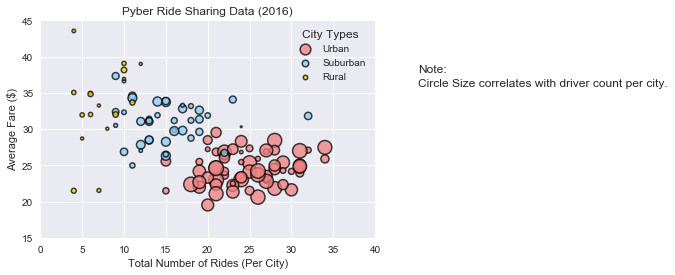

In [9]:
sns.set()
sns.axes_style()

plt.xlim(0, 40)
plt.ylim(15,45)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


#I'm not sure how long it took me to figure out to remove the comma after the handle for a scatter.  Yikes!
Urban_handle=plt.scatter(urban_summary["ride_count"], urban_summary["average_fare"], marker="o",facecolors="lightcoral",
            edgecolors="black", s=3*urban_summary["driver_count"], alpha=0.75, linewidths = 1.5,label="Urban")
Suburban_handle=plt.scatter(suburban_summary["ride_count"], suburban_summary["average_fare"], marker="o",
            facecolors="lightskyblue",edgecolors="black",s=3*suburban_summary["driver_count"],
            alpha=0.75,linewidths = 1.5,label="Suburban")
Rural_handle=plt.scatter(rural_summary["ride_count"], rural_summary["average_fare"], marker="o",
            facecolors="gold",edgecolors="black",s=3*rural_summary["driver_count"],
            alpha=0.75,linewidths = 1.5,label="Rural")


plt.legend(handles=[Urban_handle, Suburban_handle, Rural_handle], loc="upper right", fontsize = "small",title="City Types")

plt.figtext (1,.7,"Note:")
plt.figtext (1,.65,"Circle Size correlates with driver count per city.")

#I liked this method to plot, but then I couldn't figure out how to get the legend to work
#So I went back and plotted the city types individually to grab the handles.
#
#plt.scatter(city_summary_total["ride_count"], city_summary_total["average_fare"], marker="o",
#            facecolors=city_summary_total["color"],
#            edgecolors="black",s=3*city_summary_total["driver_count"], alpha=0.75,linewidths = 1.5)
#
#plt.legend(city_summary_total["type"],loc="upper right", fontsize = "small",title="City Types")
#Note:  legend command on the line above is not correct

plt.show()

#Breakout the ride share data by city type -- other dataframe only had average fare.
#I could have re-created but felt better using the raw fare data and summing versus multiplying average by ride count

In [10]:
urban_summary_fare = ride_share_data.loc[ride_share_data["type"]=="Urban"]
suburban_summary_fare = ride_share_data.loc[ride_share_data["type"]=="Suburban"]
rural_summary_fare = ride_share_data.loc[ride_share_data["type"]=="Rural"]

total_urban_fares = urban_summary_fare["fare"].sum()
total_suburban_fares = suburban_summary_fare["fare"].sum()
total_rural_fares = rural_summary_fare["fare"].sum()

#Total Fares by City Type

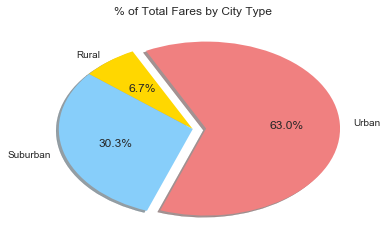

In [11]:
labels = ["Urban", "Rural", "Suburban"]

sizes = [total_urban_fares, total_rural_fares, total_suburban_fares]

colors = ["lightcoral", "gold", "lightskyblue"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Fares by City Type")
#plt.axis("equal")
plt.show()

#Total Rides by City Type

In [12]:
total_urban_rides = urban_summary["ride_count"].sum()
total_suburban_rides = suburban_summary["ride_count"].sum()
total_rural_rides = rural_summary["ride_count"].sum()

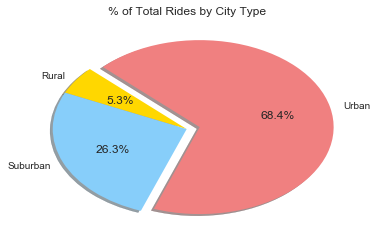

In [13]:
labels = ["Urban", "Rural", "Suburban"]

sizes = [total_urban_rides, total_rural_rides, total_suburban_rides]

colors = ["lightcoral", "gold", "lightskyblue"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Rides by City Type")

plt.show()

#Total Drivers by City Type

In [14]:
total_urban_drivers = urban_summary["driver_count"].sum()
total_suburban_drivers = suburban_summary["driver_count"].sum()
total_rural_drivers = rural_summary["driver_count"].sum()

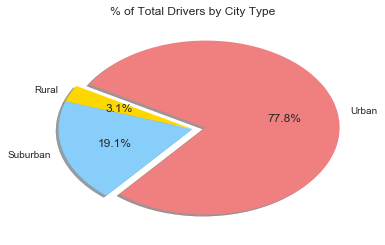

In [15]:
labels = ["Urban", "Rural", "Suburban"]

sizes = [total_urban_drivers, total_rural_drivers, total_suburban_drivers]

colors = ["lightcoral", "gold", "lightskyblue"]

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)

plt.title("% of Total Drivers by City Type")

plt.show()